# Project on suicide rate in the U.K from 1985-2015

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np


In [2]:
from matplotlib import pyplot as plt

## Data Preparation and Cleaning
1. Load file using Pandas
2. Look at some information about the data and the columns
3. Fix any missing or incorrect values

In [3]:
master_csv = Path.home() / 'Desktop/master.csv'

In [4]:
df = pd.read_csv(master_csv)

In [5]:
df

,country,year,sex,age,suicides_no,population,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Albania,1987,male,15-24 years,21,"312,900",NaN,NaN,NaN,NaN,NaN
1,Albania,1987,male,35-54 years,16,"308,000",NaN,NaN,"Suicide per 100,000 population",Column Labels,NaN
2,Albania,1987,female,15-24 years,14,"289,700",NaN,NaN,Country,female,male
3,Albania,1987,male,75+ years,1,"21,800",NaN,NaN,1985,6.33,16.87
4,Albania,1987,male,25-34 years,9,"274,300",NaN,NaN,1986,6.45,17.18
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,"3,620,833",NaN,NaN,NaN,NaN,NaN
27816,Uzbekistan,2014,female,75+ years,9,"348,465",NaN,NaN,NaN,NaN,NaN
27817,Uzbekistan,2014,male,5-14 years,60,"2,762,158",NaN,NaN,NaN,NaN,NaN
27818,Uzbekistan,2014,female,5-14 years,44,"2,631,600",NaN,NaN,NaN,NaN,NaN


In [6]:
# check if any of the rows in each column is empty(na)
df.isna().any()

country        False
year           False
sex            False
age            False
suicides_no    False
population     False
Unnamed: 6      True
Unnamed: 7      True
Unnamed: 8      True
Unnamed: 9      True
Unnamed: 10     True
dtype: bool

In [7]:
# select the data that is needed for analysis
model_df = df[['country', 'year', 'sex', 'age', 'suicides_no', 'population']]

In [8]:
model_df

,country,year,sex,age,suicides_no,population
0,Albania,1987,male,15-24 years,21,"312,900"
1,Albania,1987,male,35-54 years,16,"308,000"
2,Albania,1987,female,15-24 years,14,"289,700"
3,Albania,1987,male,75+ years,1,"21,800"
4,Albania,1987,male,25-34 years,9,"274,300"
...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,"3,620,833"
27816,Uzbekistan,2014,female,75+ years,9,"348,465"
27817,Uzbekistan,2014,male,5-14 years,60,"2,762,158"
27818,Uzbekistan,2014,female,5-14 years,44,"2,631,600"


### U.K Data Analysis

In [9]:
# filter out the data needed for project analysis
filt = model_df['country'] == 'United Kingdom'

In [10]:
uk_df = model_df[filt]
uk_df

,country,year,sex,age,suicides_no,population
26476,United Kingdom,1985,male,75+ years,264,"1,202,838"
26477,United Kingdom,1985,male,55-74 years,915,"5,170,113"
26478,United Kingdom,1985,male,35-54 years,1208,"6,899,879"
26479,United Kingdom,1985,male,25-34 years,620,"3,969,689"
26480,United Kingdom,1985,female,55-74 years,678,"6,002,096"
...,...,...,...,...,...,...
26843,United Kingdom,2015,female,25-34 years,181,"4,414,464"
26844,United Kingdom,2015,female,75+ years,108,"3,070,457"
26845,United Kingdom,2015,female,15-24 years,104,"3,966,564"
26846,United Kingdom,2015,female,5-14 years,6,"3,663,221"


In [11]:
# check if the values are of the necessary datatypes

uk_df.dtypes

country        object
year            int64
sex            object
age            object
suicides_no     int64
population     object
dtype: object

In [12]:
# converting the object into a format that can be converted to a numerical datatype

pop_contain_comma = uk_df['population'].str.contains(',')
uk_df.loc[ : , 'population'] = np.where(pop_contain_comma, uk_df['population'].str.replace(',', ''), uk_df['population'])

C:\Users\ATIMAH\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
# converting the datatype 

uk_df.loc[ : , 'population'] = uk_df['population'].astype(int)

In [14]:
uk_df['suicide_per_100,000_population'] = (uk_df['suicides_no']/uk_df['population']) * 100000

C:\Users\ATIMAH\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
uk_df.loc[:, ['suicide_per_100,000_population']] = uk_df['suicide_per_100,000_population'].round()

## Exploratory Analysis & visualization using matplotlib
1. Get the clean data you need for analysis
2. Explore the data for insights by filtering, grouping, concatenating or using whatever technique that helps the process
3. Visualize your results

### U.K suicide rate from 1985-2015 by sex

In [16]:
uk_df

,country,year,sex,age,suicides_no,population,"suicide_per_100,000_population"
26476,United Kingdom,1985,male,75+ years,264,1202838,22.0
26477,United Kingdom,1985,male,55-74 years,915,5170113,18.0
26478,United Kingdom,1985,male,35-54 years,1208,6899879,18.0
26479,United Kingdom,1985,male,25-34 years,620,3969689,16.0
26480,United Kingdom,1985,female,55-74 years,678,6002096,11.0
...,...,...,...,...,...,...,...
26843,United Kingdom,2015,female,25-34 years,181,4414464,4.0
26844,United Kingdom,2015,female,75+ years,108,3070457,4.0
26845,United Kingdom,2015,female,15-24 years,104,3966564,3.0
26846,United Kingdom,2015,female,5-14 years,6,3663221,0.0


In [17]:
# get the male data and then find the (suicide per 100,000 population) for each year
filt = uk_df['sex'] == 'male'
male_sex = uk_df[filt]

male_grp = male_sex.groupby('year')['suicide_per_100,000_population'].sum()

male_grp = male_grp.rename('Male')

In [18]:
# get the female data and then find the (suicide per 100,000 population) for each year
filt = uk_df['sex'] == 'female'
female_sex = uk_df[filt]

female_grp = female_sex.groupby('year')['suicide_per_100,000_population'].sum()

female_grp = female_grp.rename('Female')

In [19]:
# x-axis
# any index from either the male or the female data can be used since they both contain same values for the x-axis
year_x = list(male_grp.index)

In [20]:
# y-axis
male_y = list(male_grp)

female_y = list(female_grp)

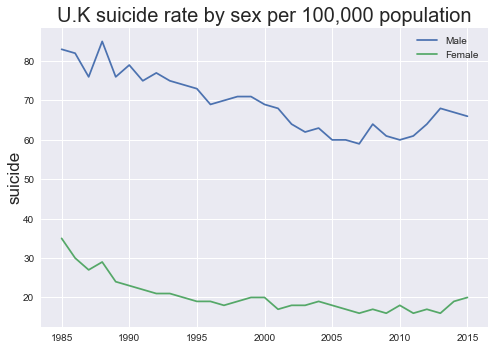

In [21]:
# visualization of data
plt.style.use('seaborn')

plt.plot(year_x, male_y, label='Male')
plt.plot(year_x, female_y, label='Female')

plt.title('U.K suicide rate by sex per 100,000 population', fontdict= {'fontsize': 20,
            'fontweight' : 10,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'})
plt.ylabel('suicide', fontdict= {'fontsize': 17,
            'fontweight' : 10,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'})
plt.legend()

plt.show()

### U.K population from 1985-2015 by sex

In [22]:
uk_df

,country,year,sex,age,suicides_no,population,"suicide_per_100,000_population"
26476,United Kingdom,1985,male,75+ years,264,1202838,22.0
26477,United Kingdom,1985,male,55-74 years,915,5170113,18.0
26478,United Kingdom,1985,male,35-54 years,1208,6899879,18.0
26479,United Kingdom,1985,male,25-34 years,620,3969689,16.0
26480,United Kingdom,1985,female,55-74 years,678,6002096,11.0
...,...,...,...,...,...,...,...
26843,United Kingdom,2015,female,25-34 years,181,4414464,4.0
26844,United Kingdom,2015,female,75+ years,108,3070457,4.0
26845,United Kingdom,2015,female,15-24 years,104,3966564,3.0
26846,United Kingdom,2015,female,5-14 years,6,3663221,0.0


In [23]:
# get the male data and then find the (population) for each year
filt = uk_df['sex'] == 'male'
male_sex = uk_df[filt]

male_grp = male_sex.groupby('year')['population'].sum()

male_grp = male_grp.rename('Male')

In [24]:
# get the female data and then find the (population) for each year
filt = uk_df['sex'] == 'female'
female_sex = uk_df[filt]

female_grp = female_sex.groupby('year')['population'].sum()

female_grp = female_grp.rename('Female')

In [25]:
# x-axis
# any index from either the male or the female data can be used since they both contain same values for the x-axis
year_x = list(male_grp.index)

In [26]:
# y-axis
male_y = list(male_grp)

female_y = list(female_grp)

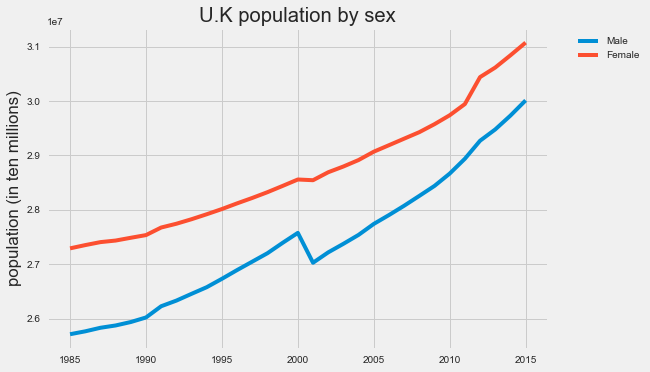

In [32]:
# visualization of data
plt.style.use('fivethirtyeight')

plt.plot(year_x, male_y, label='Male')
plt.plot(year_x, female_y, label='Female')

plt.title('U.K population by sex')
plt.ylabel('population (in ten millions)')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.7, 1.0))

plt.show()

### U.K suicide rate from 1985-2015 by age group

In [28]:
list_ages = list(uk_df['age'].unique())

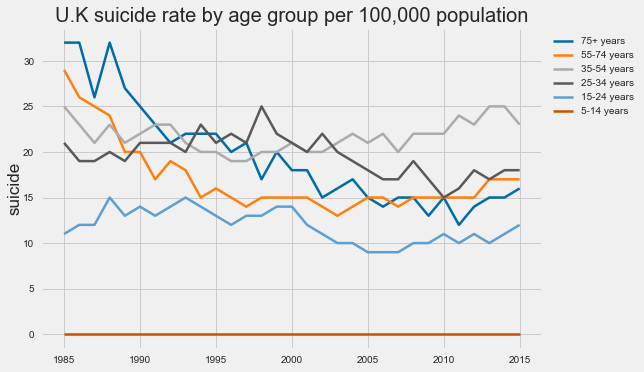

In [35]:
# get the (suicide per 100,000 population) of the various age groups by year
for item in list_ages:
    filt = uk_df['age'] == item
    grp = uk_df[filt].groupby('year')['suicide_per_100,000_population'].sum()
    grp.rename(item)
    
    axis_x = list(grp.index)
    axis_y = list(grp)
    
#     plotting
    plt.style.use('tableau-colorblind10')

    plt.plot(axis_x, axis_y, linewidth=2.5, label=item)
    
plt.title('U.K suicide rate by age group per 100,000 population', fontdict= {'fontsize': 20,
            'fontweight' : 10,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'})
plt.ylabel('suicide', fontdict= {'fontsize': 17,
            'fontweight' : 10,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'})
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.7, 1.0))

plt.show()


### U.K population from 1985-2015 by age group

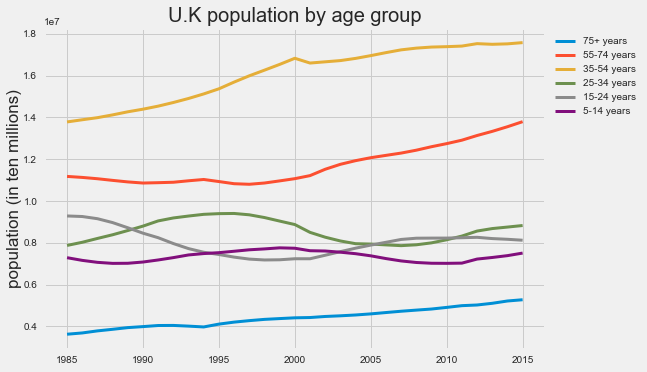

In [38]:
# get the (population) of the various age groups by year
for item in list_ages:
    filt = uk_df['age'] == item
    grp = uk_df[filt].groupby('year')['population'].sum()
    grp.rename(item)
    
    axis_x = list(grp.index)
    axis_y = list(grp)
    
#     plotting
    plt.style.use('fivethirtyeight')

    plt.plot(axis_x, axis_y, linewidth=3, label=item)
    
plt.title('U.K population by age group', fontdict= {'fontsize': 20,
            'fontweight' : 10,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'})
plt.ylabel('population (in ten millions)', fontdict= {'fontsize': 17,
            'fontweight' : 10,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'})
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.7, 1.0))

plt.show()


## Asking questions about the project data
1. which gender were more suicidal from 1985-2015 in the uk.
2. which age group were more suicidal from 1985-2015 in the uk.

## Summarize your inferences & write a conclusion
1. There are 101 countries in the dataset.
2. 372 entries from the United Kingdom.
### Inferences from the U.K dataset
1. The population of women per year from 1985-2015 was more than that of men.
2. From 1985-2015 the suicide rate of men was more than twice that of women.
3. The least populated age group from 1985-2015 were the 75+ years while the most populated were 35-54 years.
4. People who were 75+ years showed an all time high number of suicides between the timeline.
### Conlusion from the U.K dataset
1. Men were more suicidal than women from 1985-2015.
2. In the mid 80's to the early 90's people who were 75+ years were the most suicidal age group.
3. From the early 2000's to 2015 people between the ages of 35-54 were the most suicidal age group.